# 4.10 Instacart Reporting

## Importing Libraries and Data

Libraries

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

Data

In [4]:
path = r'C:\Users\chris\Desktop\Upskilling\CareerFoundry\Data Immersion\Achievement 4_Python Fundamentals for Data Analysts\08-2025 Instacart Basket Analysis'

In [5]:
df_ords_prods_custs = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'order_products_customers.pkl'))

In [6]:
df_ords_prods_custs.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,spend_flag,median_days_since_prior_order,frequency_flag,Gender,State,Age,n_dependants,fam_status,income,_merge_customers
0,2539329,1,1,2,8,0.0,yes,196,1,0,...,Low spender,20.0,Regular customer,Female,Alabama,31,3,married,40423,both
1,2539329,1,1,2,8,0.0,yes,14084,2,0,...,Low spender,20.0,Regular customer,Female,Alabama,31,3,married,40423,both
2,2539329,1,1,2,8,0.0,yes,12427,3,0,...,Low spender,20.0,Regular customer,Female,Alabama,31,3,married,40423,both
3,2539329,1,1,2,8,0.0,yes,26088,4,0,...,Low spender,20.0,Regular customer,Female,Alabama,31,3,married,40423,both
4,2539329,1,1,2,8,0.0,yes,26405,5,0,...,Low spender,20.0,Regular customer,Female,Alabama,31,3,married,40423,both


Consider any security implications that might exist for this new data. Any PII in the data will need to be addressed before continuing the analysis.

In [9]:
print(df_ords_prods_custs.columns)

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'department_id', '_merge', 'meat_eater', 'prices', '_merge_prices',
       'price_range_loc', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'avg_product_price', 'spend_flag',
       'median_days_since_prior_order', 'frequency_flag', 'Gender', 'State',
       'Age', 'n_dependants', 'fam_status', 'income', '_merge_customers'],
      dtype='object')


First and last names of customers have already been dropped from this dataframe at they were deemed unimportant for the analysis
Other sensitive data (age, location, gender), is still conatined in th dataframe and could pose a privacy risk.

Department names is needed as a new column and needs to be pulled across from the departments data set

In [11]:
df_dept = pd.read_csv(os.path.join(path, '02. Data', 'Prepared Data','departments_wrangled.csv' ), index_col = False)

In [12]:
df_dept.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


Renaming Column with department ID

In [13]:
df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [14]:
df_dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


Connecting the depatartment dataframe with the main dataframe via department_id using a dictionary

In [15]:
zipped = zip(df_dept['department_id'], df_dept['department'])
data_dict = dict(zipped)

In [17]:
df_ords_prods_custs['department'] = df_ords_prods_custs['department_id'].map(data_dict)

In [18]:
df_ords_prods_custs.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,median_days_since_prior_order,frequency_flag,Gender,State,Age,n_dependants,fam_status,income,_merge_customers,department
0,2539329,1,1,2,8,0.0,yes,196,1,0,...,20.0,Regular customer,Female,Alabama,31,3,married,40423,both,beverages
1,2539329,1,1,2,8,0.0,yes,14084,2,0,...,20.0,Regular customer,Female,Alabama,31,3,married,40423,both,dairy eggs
2,2539329,1,1,2,8,0.0,yes,12427,3,0,...,20.0,Regular customer,Female,Alabama,31,3,married,40423,both,snacks
3,2539329,1,1,2,8,0.0,yes,26088,4,0,...,20.0,Regular customer,Female,Alabama,31,3,married,40423,both,snacks
4,2539329,1,1,2,8,0.0,yes,26405,5,0,...,20.0,Regular customer,Female,Alabama,31,3,married,40423,both,household


### Assigning regions based on states

A region column will be created based on the 'state' column.
Regions will be based on the divisons outlined in the provided link. (https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States)

In [19]:
state_to_region = {
    # Northeast
    'Maine': 'Northeast', 'New Hampshire': 'Northeast', 'Vermont': 'Northeast', 'Massachusetts': 'Northeast', 
    'Rhode Island': 'Northeast', 'Connecticut': 'Northeast', 'New York': 'Northeast', 'Pennsylvania': 'Northeast', 'New Jersey': 'Northeast',
    
    # Midwest
    'Wisconsin': 'Midwest', 'Michigan': 'Midwest', 'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Ohio': 'Midwest',
    'North Dakota': 'Midwest', 'South Dakota': 'Midwest', 'Nebraska': 'Midwest', 'Kansas': 'Midwest', 'Minnesota': 'Midwest', 
    'Iowa': 'Midwest', 'Missouri': 'Midwest',
    
    # South
    'Delaware': 'South', 'Maryland': 'South', 'District of Columbia': 'South', 'Virginia': 'South', 'West Virginia': 'South', 'North Carolina': 'South',
    'South Carolina': 'South', 'Georgia': 'South', 'Florida': 'South', 'Kentucky': 'South', 'Tennessee': 'South', 'Mississippi': 'South',
    'Alabama': 'South', 'Oklahoma': 'South', 'Texas': 'South', 'Arkansas': 'South', 'Louisiana': 'South',
    
    # West
    'Idaho': 'West', 'Montana': 'West', 'Wyoming': 'West', 'Nevada': 'West', 'Utah': 'West', 'Colorado': 'West', 'Arizona': 'West', 'New Mexico': 'West',
    'Alaska': 'West', 'Washington': 'West', 'Oregon': 'West', 'California': 'West', 'Hawaii': 'West'
}

In [21]:
df_ords_prods_custs['region'] = df_ords_prods_custs['State'].map(state_to_region)

In [25]:
df_ords_prods_custs[['region', 'State']]

,region,State
0,South,Alabama
1,South,Alabama
2,South,Alabama
3,South,Alabama
4,South,Alabama
...,...,...
32436194,Midwest,Iowa
32436195,Midwest,Iowa
32436196,Midwest,Iowa
32436197,Midwest,Iowa


In [27]:
df_ords_prods_custs.shape

(32436199, 34)

### Determine whether there’s a difference in spending habits between the different U.S. regions using crosstab

In [30]:
crosstab_regional_spending = pd.crosstab(df_ords_prods_custs['region'], df_ords_prods_custs['spend_flag'], dropna = False)

In [31]:
crosstab_regional_spending

spend_flag,High spender,Low spender
region,,
Midwest,156035,7448291
Northeast,108282,5620348
South,209896,10592458
West,160442,8140447


Low spenders make up the highest proportion of customers across all regions - % split below:

Midwest - 97.9%
Northwest - 98.1%
South - 98.1%
West - 98.1%

Lower spenders make up 98% of customers in each region

Creating a bar chart to show regional spending flag

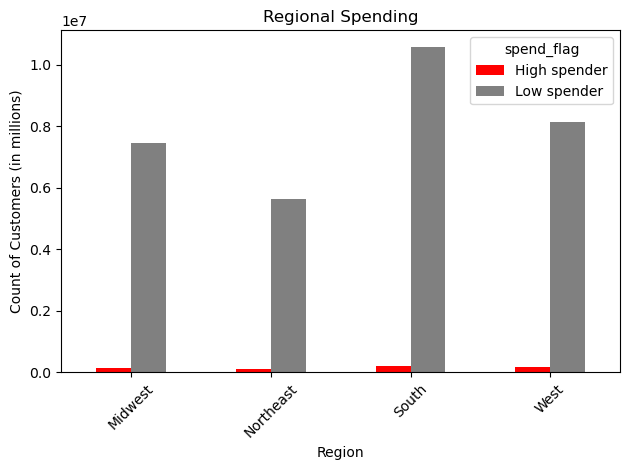

In [32]:
bar_reg_spending = crosstab_regional_spending.plot(kind="bar", color = ['red', 'gray'] )
plt.title ('Regional Spending')
plt.xlabel ('Region')
plt.xticks(rotation=45)
plt.ylabel ('Count of Customers (in millions)')
plt.tight_layout()

From the bar chart we can see that the South region makes up the largest customer group and the northwest is the smallest group in terms of numbers of customers

Exporting bar chart

In [35]:
bar_reg_spending.figure.savefig(os.path.join(path, '04. Analysis','Visualisations', 'bar_regional_spending.png'), bbox_inches='tight')

### Create an exclusion flag for low-activity customers

The CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data

In [36]:
df_ords_prods_custs.loc[df_ords_prods_custs['max_order'] < 5, 'customer_activity'] = 'low'
df_ords_prods_custs.loc[df_ords_prods_custs['max_order'] >= 5, 'customer_activity'] = 'high'

In [38]:
df_ords_prods_custs['customer_activity'].value_counts(dropna = False)

customer_activity
high    30994535
low      1441664
Name: count, dtype: int64

Creating a new dataframe with just the low activity customers using subset

In [40]:
df_low_act_cust = df_ords_prods_custs[df_ords_prods_custs['customer_activity']=='low']

In [41]:
df_low_act_cust.shape

(1441664, 35)

Exporting this new dataframe

In [42]:
df_low_act_cust.to_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'low_activity_customers.pkl'))

Removing the low activity customers from the main dataframe

In [43]:
df_ords_prods_custs_high = df_ords_prods_custs[df_ords_prods_custs['customer_activity']== 'high']

In [44]:
df_ords_prods_custs_high.shape

(30994535, 35)

## Analysis for Stakeholder questions

Key Question 4: The marketing and sales teams want to know which departments have the highest frequency of product orders.

In [49]:
df_ords_prods_custs_high['department'].value_counts()

department
produce            9079276
dairy eggs         5177698
snacks             2766406
beverages          2571909
frozen             2121732
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699858
meat seafood        674781
breakfast           670850
personal care       424821
babies              410400
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

Creating a bar chart to visualise this information

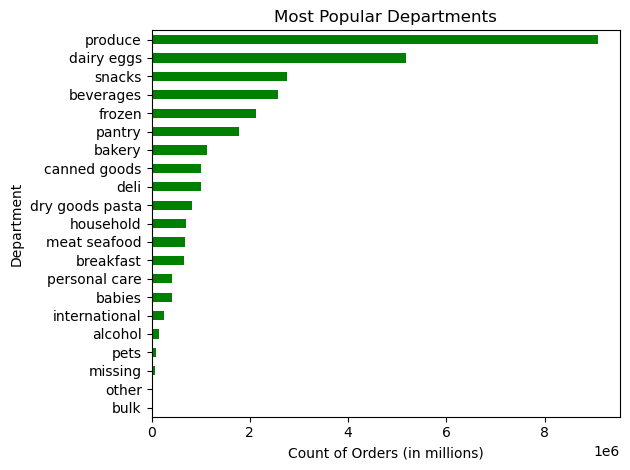

In [50]:
bar_pop_dept = df_ords_prods_custs_high['department'].value_counts().sort_values().plot(kind = 'barh', color = ['green'])
plt.title('Most Popular Departments')
plt.xlabel('Count of Orders (in millions)')
plt.ylabel('Department')
plt.tight_layout()

The top 5 departments are produce, dairy/eggs, snacks, beverages and frozen foods

In [51]:
df_ords_prods_custs_high['product_name'].value_counts()

product_name
Banana                                                                                 453164
Bag of Organic Bananas                                                                 366403
Organic Strawberries                                                                   255988
Organic Baby Spinach                                                                   231772
Organic Hass Avocado                                                                   206799
                                                                                        ...  
Indoor & Outdoor Allergies, Allergy & Congestion, 24 Hour, Extended Release Tablets         1
WetJet Floor Mop Starter Kit                                                                1
Kb Clb Stick Organic Fmly                                                                   1
Duck & Veal Demi Glace                                                                      1
Hot Oatmeal Multigrain Raisin                  

The top 5 products are bananas and organic bananas, organic strawberries, organic baby spinach and organic hass avocado

In [52]:
top_products = df_ords_prods_custs_high['product_name'].value_counts().head(10)

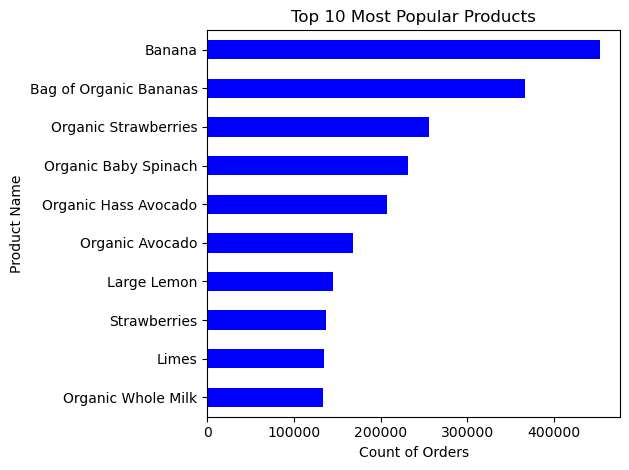

In [53]:
bar_top_products = top_products.sort_values().plot(kind='barh', color='blue')

plt.title('Top 10 Most Popular Products')
plt.xlabel('Count of Orders')
plt.ylabel('Product Name')
plt.tight_layout()

Exporting these two bar charts

In [54]:
bar_pop_dept.figure.savefig(os.path.join(path, '04. Analysis','Visualisations', 'bar_top_products.png'), bbox_inches='tight')
bar_top_products.figure.savefig(os.path.join(path, '04. Analysis','Visualisations', 'bar_top_products.png'), bbox_inches='tight')

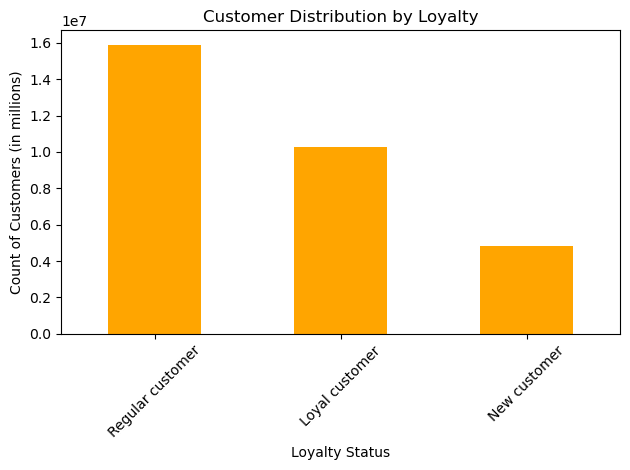

In [57]:
bar_loyalty_dist = df_ords_prods_custs_high['loyalty_flag'].value_counts().plot.bar(color = 'orange')


plt.title('Customer Distribution by Loyalty')
plt.xlabel('Loyalty Status')
plt.ylabel('Count of Customers (in millions)')
plt.xticks(rotation=45)
plt.tight_layout()

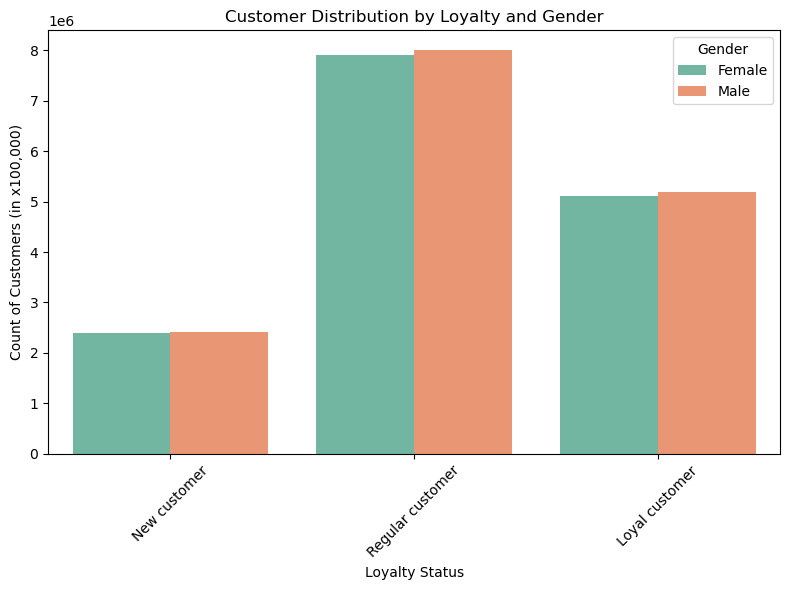

In [62]:
plt.figure(figsize=(8,6))

sns.countplot(
    data=df_ords_prods_custs_high,
    x='loyalty_flag',
    hue='Gender',
    palette='Set2'
)

plt.title('Customer Distribution by Loyalty and Gender')
plt.xlabel('Loyalty Status')
plt.ylabel('Count of Customers (in x100,000)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [60]:
crosstab_loyalty_gender = pd.crosstab(df_ords_prods_custs_high['Gender'], df_ords_prods_custs_high['loyalty_flag'], dropna = False)

In [63]:
crosstab_loyalty_gender

loyalty_flag,Loyal customer,New customer,Regular customer
Gender,,,
Female,5108158,2387593,7897140
Male,5186005,2420602,7995037


In [66]:

df_ords_prods_custs_high.groupby('loyalty_flag').agg({'median_days_since_prior_order': ['min', 'max', 'mean']})

median_days_since_prior_order                 
                                           min   max       mean
loyalty_flag                                                   
Loyal customer                             0.0  14.0   5.110152
New customer                               0.0  30.0  15.953080
Regular customer                           0.0  30.0  10.075763

In [68]:
crosstab_region_dept = pd.crosstab(df_ords_prods_custs_high['department'], df_ords_prods_custs_high['region'])

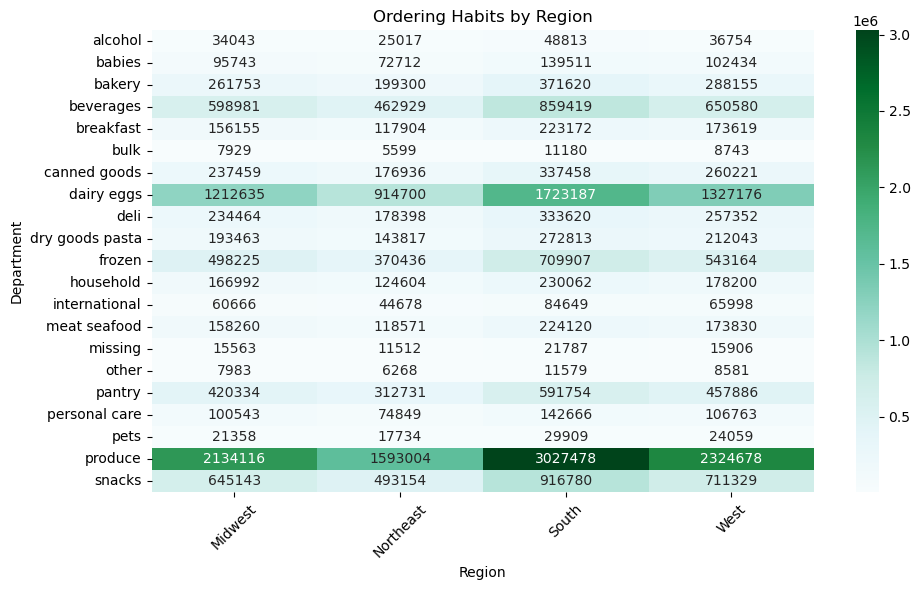

In [69]:
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_region_dept, annot=True, fmt='d', cmap='BuGn')
plt.title('Ordering Habits by Region')
plt.xlabel('Region')
plt.ylabel('Department')

plt.xticks(rotation=45)
plt.yticks(rotation=0)            
plt.tight_layout()

In [71]:
plt.savefig(os.path.join(path, '04. Analysis', 'Visualisations', 'heatmap_region_orders.png'), bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [72]:
crosstab_fam_status_dept = pd.crosstab(df_ords_prods_custs_high['department'], df_ords_prods_custs_high['fam_status'])

In [75]:
crosstab_fam_status_dept

fam_status,divorced/widowed,living with parents and siblings,married,single
department,,,,
alcohol,11859,8379,99421,24968
babies,34351,19381,287691,68977
bakery,95735,53684,785749,185660
beverages,220879,119107,1807461,424462
breakfast,56590,33198,471220,109842
bulk,2676,1633,23818,5324
canned goods,84268,48477,712577,166752
dairy eggs,442652,250232,3632998,851816
deli,86749,48119,702333,166633


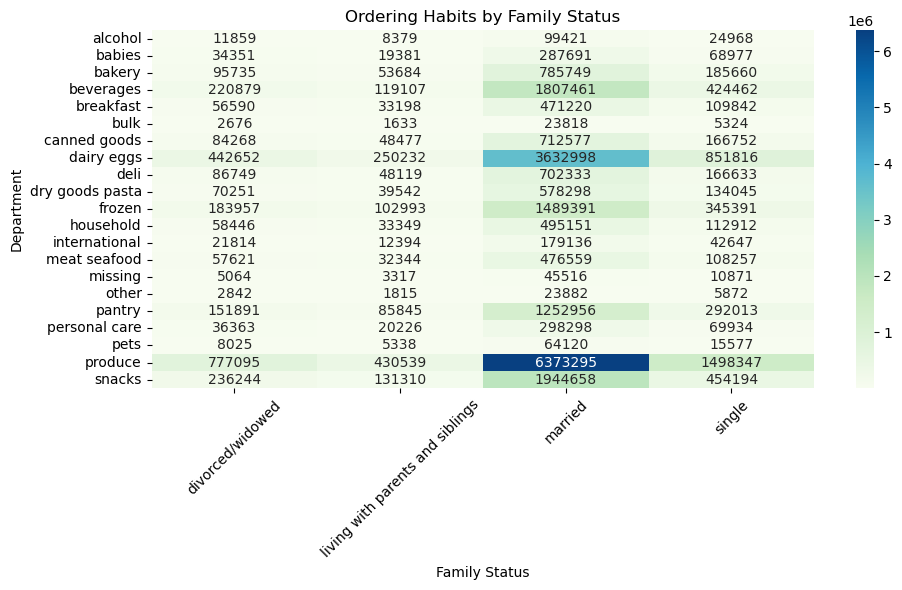

In [74]:
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_fam_status_dept, annot=True, fmt='d', cmap='GnBu')
plt.title('Ordering Habits by Family Status')
plt.xlabel('Family Status')
plt.ylabel('Department')

plt.xticks(rotation=45)
plt.yticks(rotation=0)            
plt.tight_layout()

Demographic information at a regional level

Assigning Income category based on Upper/Lower/Median quartiles

In [81]:
df_ords_prods_custs_high.loc[df_ords_prods_custs_high['income'] < 30000, 'income_category'] = 'Low Income'

In [82]:
df_ords_prods_custs_high.loc[(df_ords_prods_custs_high['income'] >= 30000) & (df_ords_prods_custs_high['income'] <= 99000), 'income_category'] = 'Average Income'

In [83]:
df_ords_prods_custs_high.loc[df_ords_prods_custs_high['income'] > 99000, 'income_category'] = 'High Income'

In [84]:
df_ords_prods_custs_high.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,State,Age,n_dependants,fam_status,income,_merge_customers,department,region,customer_activity,income_category
0,2539329,1,1,2,8,0.0,yes,196,1,0,...,Alabama,31,3,married,40423,both,beverages,South,high,Average Income
1,2539329,1,1,2,8,0.0,yes,14084,2,0,...,Alabama,31,3,married,40423,both,dairy eggs,South,high,Average Income
2,2539329,1,1,2,8,0.0,yes,12427,3,0,...,Alabama,31,3,married,40423,both,snacks,South,high,Average Income
3,2539329,1,1,2,8,0.0,yes,26088,4,0,...,Alabama,31,3,married,40423,both,snacks,South,high,Average Income
4,2539329,1,1,2,8,0.0,yes,26405,5,0,...,Alabama,31,3,married,40423,both,household,South,high,Average Income


In [85]:
df_ords_prods_custs_high['income_category'].value_counts(dropna = False)

income_category
Average Income    16175907
High Income       14624600
Low Income          194028
Name: count, dtype: int64

In [86]:
crosstab_region_income = pd.crosstab(df_ords_prods_custs_high['region'], df_ords_prods_custs_high['income_category'])

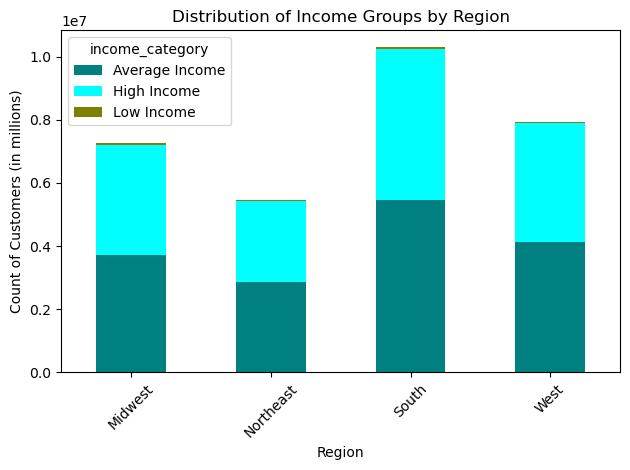

In [88]:
bar_region_income = crosstab_region_income.plot(kind='bar', stacked =True, color = ['teal', 'cyan', 'olive'])

plt.title('Distribution of Income Groups by Region')
plt.xlabel('Region')
plt.ylabel('Count of Customers (in millions)')

plt.xticks(rotation=45)          
plt.tight_layout()

In [89]:
df_ords_prods_custs_high['Age']

0           31
1           31
2           31
3           31
4           31
            ..
32436194    74
32436195    74
32436196    74
32436197    74
32436198    74
Name: Age, Length: 30994535, dtype: int16

In [90]:
crosstab_region_income

income_category,Average Income,High Income,Low Income
region,,,
Midwest,3716558,3498371,53267
Northeast,2852885,2584338,33109
South,5462720,4793342,65109
West,4143744,3748549,42543


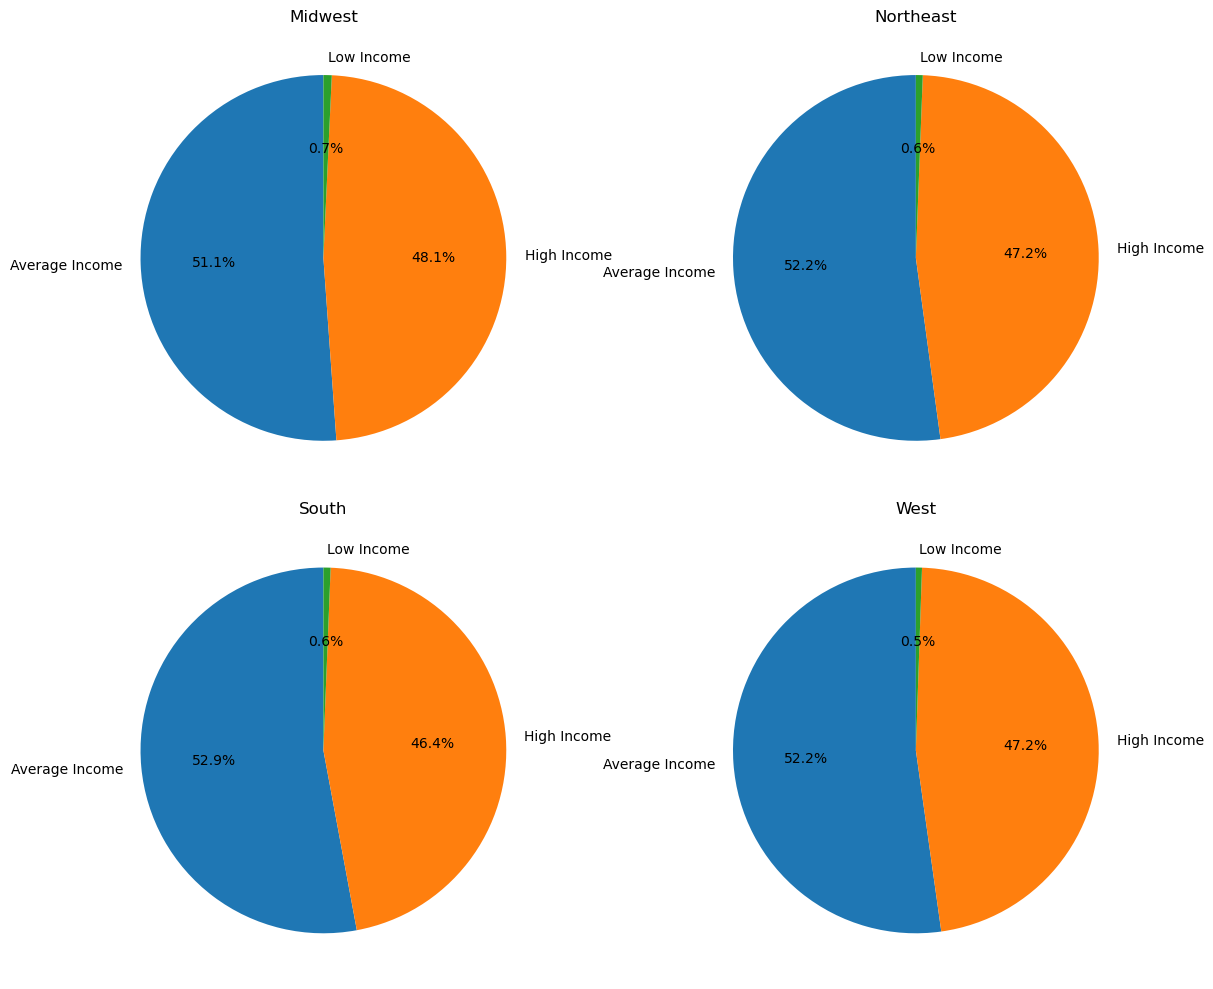

In [91]:
data = {
    "Average Income": [3716558, 2852885, 5462720, 4143744],
    "High Income":    [3498371, 2584338, 4793342, 3748549],
    "Low Income":     [53267,   33109,   65109,   42543]
}
regions = ["Midwest", "Northeast", "South", "West"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, region, avg, high, low in zip(
        axes.flatten(),
        regions,
        data["Average Income"],
        data["High Income"],
        data["Low Income"]):

    values = [avg, high, low]
    labels = ["Average Income", "High Income", "Low Income"]

    ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.set_title(region)

plt.tight_layout()
plt.show()

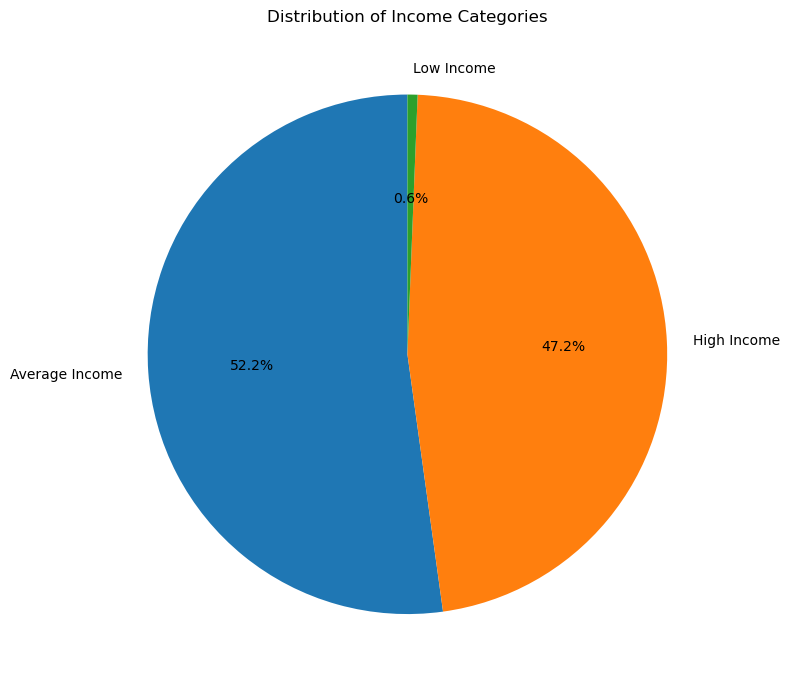

In [93]:
income_counts = df_ords_prods_custs_high['income_category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    income_counts,
    labels=income_counts.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Distribution of Income Categories")
plt.tight_layout()
plt.show()

In [97]:
df_ords_prods_custs_high.loc[df_ords_prods_custs_high['Age'] <= 33, 'age_category'] = 'Young adult'

In [99]:
df_ords_prods_custs_high.loc[(df_ords_prods_custs_high['Age'] > 33) & (df_ords_prods_custs_high ['Age'] < 65), 'age_category'] = 'Middle-aged adult'

In [100]:
df_ords_prods_custs_high.loc[df_ords_prods_custs_high['Age'] >= 65, 'age_category'] = 'Senior'

In [102]:
crosstab_region_age = pd.crosstab(df_ords_prods_custs_high['region'], df_ords_prods_custs_high['age_category'])

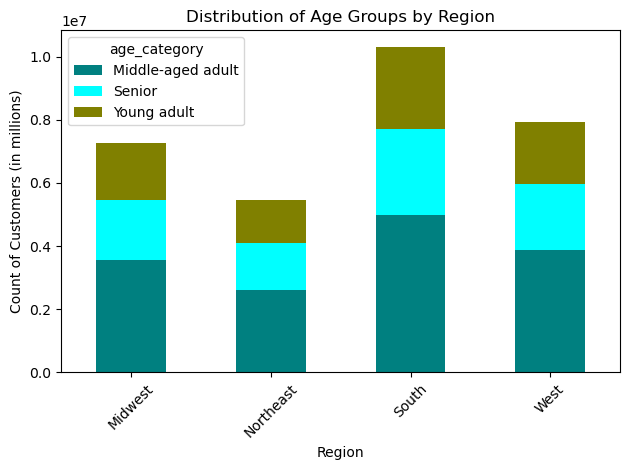

In [103]:
bar_region_age = crosstab_region_age.plot(kind='bar', stacked =True, color = ['teal', 'cyan', 'olive'])

plt.title('Distribution of Age Groups by Region')
plt.xlabel('Region')
plt.ylabel('Count of Customers (in millions)')

plt.xticks(rotation=45)          
plt.tight_layout()

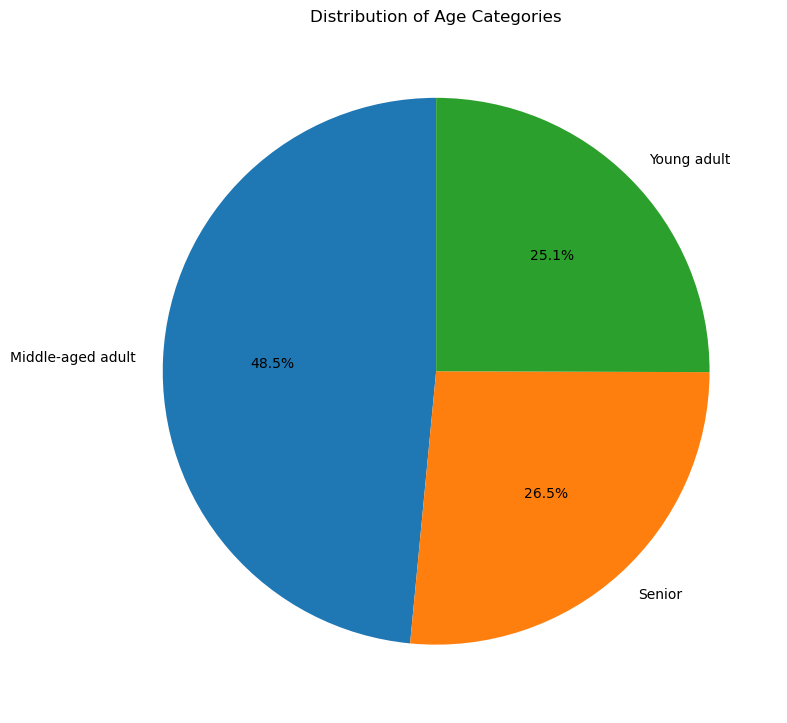

In [105]:
age_counts = df_ords_prods_custs_high['age_category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    age_counts,
    labels=age_counts.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Distribution of Age Categories")
plt.tight_layout()
plt.show()

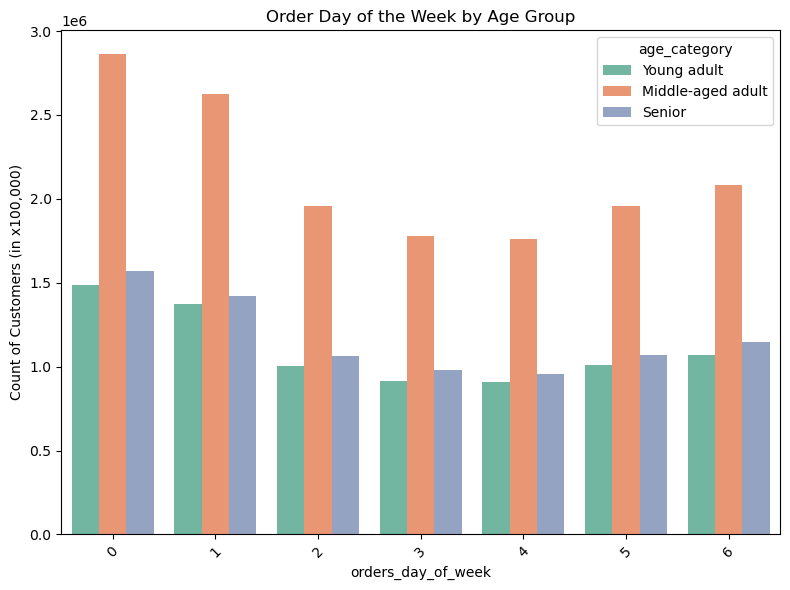

In [106]:
plt.figure(figsize=(8,6))

sns.countplot(
    data=df_ords_prods_custs_high,
    x='orders_day_of_week',
    hue='age_category',
    palette='Set2'
)

plt.title('Order Day of the Week by Age Group')
plt.xlabel('orders_day_of_week')
plt.ylabel('Count of Customers (in x100,000)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [108]:
crosstab_age_cat_dept = pd.crosstab(df_ords_prods_custs_high['department'], df_ords_prods_custs_high['age_category'])

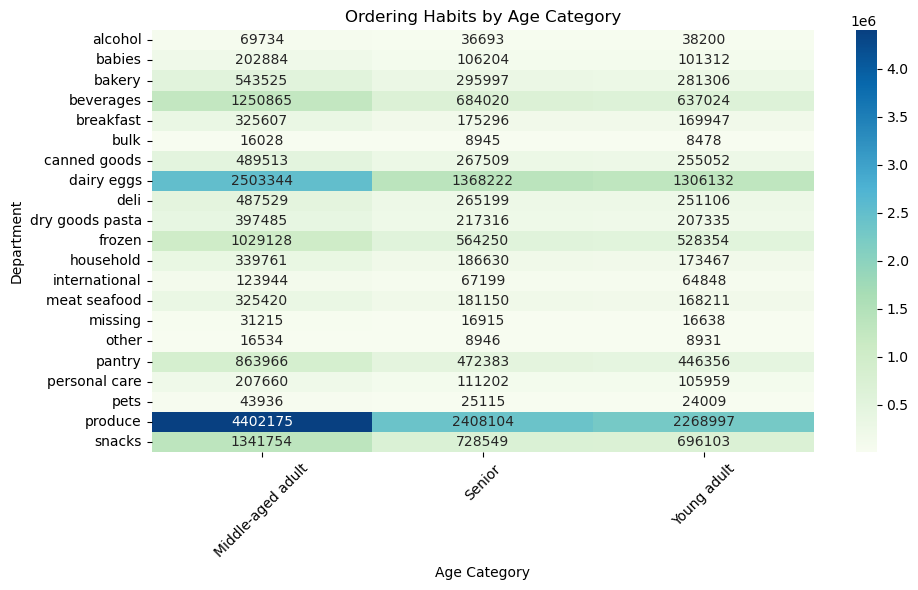

In [109]:
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_age_cat_dept, annot=True, fmt='d', cmap='GnBu')
plt.title('Ordering Habits by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Department')

plt.xticks(rotation=45)
plt.yticks(rotation=0)            
plt.tight_layout()

In [110]:
crosstab_price_range_dept = pd.crosstab(df_ords_prods_custs_high['department'], df_ords_prods_custs_high['price_range_loc'])

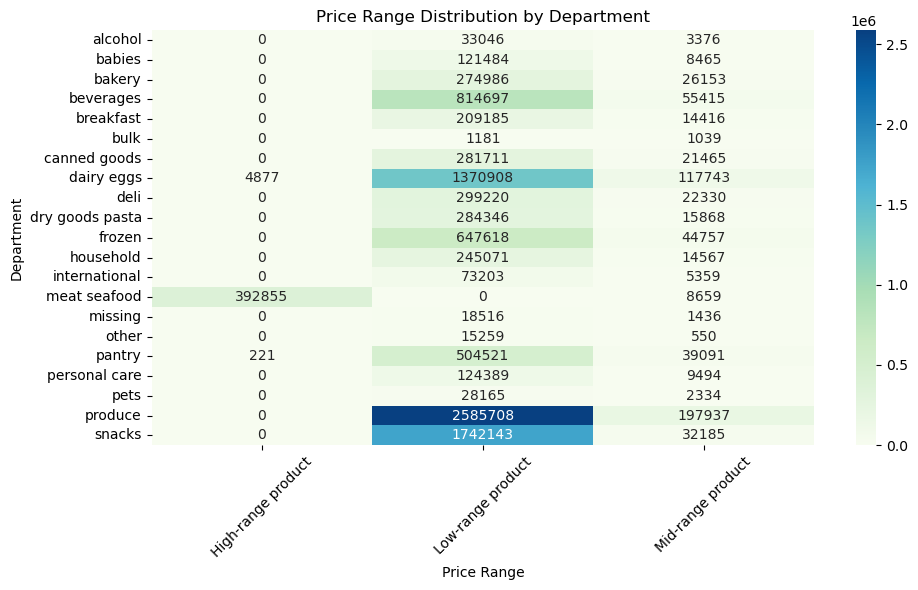

In [112]:
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_price_range_dept, annot=True, fmt='d', cmap='GnBu')
plt.title('Price Range Distribution by Department')
plt.xlabel('Price Range')
plt.ylabel('Department')

plt.xticks(rotation=45)
plt.yticks(rotation=0)            
plt.tight_layout()